# What's the challenge here?Well, the bank has been seeing unusual churn rates.
So churn is when people leave the company and they've seen customers leaving at
unusually high rates and they want to understand what the problem is; they want
to assess and address that problem.our goal is to create a demographic centric 
model to tell the bank which of the customers are at highest risk of leaving.

In [113]:
#Created on Thu Jun 27 11:14:12 2019

#For training purposes I will use different machine Learning methods

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

dataset=pd.read_csv("Churn_Modelling.csv")
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


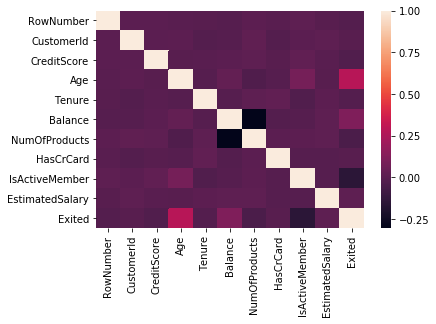

In [101]:
sn.heatmap(dataset.corr())
# As we can see in heatmap ,non of the features have a significant correlation with each other.
#it's good news and it means that we can consider all of them as independent features in the optimization process

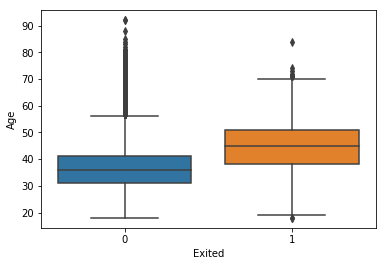

In [115]:
sn.boxplot(x=dataset["Exited"],y=dataset["Age"],data=dataset)

 In machine learning projects, one important part is feature engineering. It is very common to see categorical features in a dataset. However, our machine learning algorithm can only read numerical values. It is essential to encoding categorical features into numerical values. 

# Encoding categorical features with Pandas

In [63]:
# Data Prepocessing first method: Create dummy variables with Pandas
X=pd.get_dummies(X,drop_first="True")
X.head()

#spliting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#Standardize Data
#data type must be array
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train.values)
X_test=ss.transform(X_test.values)

# Encoding categorical features with LabelEncoder and OneHotEncoder from Scikit-Learn
In this case, using LabelEncoder only is not a good choice, since it brings in a natural ordering for different classes. For example, under ‘Country’ feature, France has value 0 but Germany has value 1, is Germany ‘greater’ than France? The answer is obviously no. Thus allowing model learning this result will lead to poor performance. Therefore, for dataframe containing multi class features, a further step of OneHotEncoder is needed. 

In [79]:
#LogisticRegression(LR)
from sklearn.linear_model import LogisticRegression
classifier_LR=LogisticRegression(solver="lbfgs")
classifier_LR.fit(X_train,y_train)

y_pred_LR=classifier_LR.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
CM_LR=confusion_matrix(y_test,y_pred_LR)
AcS_LR=accuracy_score(y_test,y_pred_LR)

print ("Confusion Matrix is: ",CM_LR,"\n", "Accuracy Score is: ",AcS_LR)

Confusion Matrix is:  [[1526   69]
 [ 309   96]] 
 Accuracy Score is:  0.811


In [81]:
#SVM 
from sklearn.svm import SVC
#SVM with poly kernel
classifier_SVM_poly=SVC(kernel="poly",random_state=0)
classifier_SVM_poly.fit(X_train,y_train)

y_pred_poly=classifier_SVM_poly.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
CM_SVM_poly=confusion_matrix(y_test,y_pred_poly)
AcS_SVM_poly=accuracy_score(y_test,y_pred_poly)

print ("Confusion Matrix is: ",CM_SVM_poly,"\n", "Accuracy Score is: ",AcS_SVM_poly)

Confusion Matrix is:  [[1551   44]
 [ 242  163]] 
 Accuracy Score is:  0.857


In [84]:

#SVM with rbf kernel
classifier_SVM_rbf=SVC(kernel="rbf",random_state=0)
classifier_SVM_rbf.fit(X_train,y_train)

y_pred_rbf=classifier_SVM_rbf.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
CM_SVM_rbf=confusion_matrix(y_test,y_pred_rbf)
AcS_SVM_rbf=accuracy_score(y_test,y_pred_rbf)

print ("Confusion Matrix is: ",CM_SVM_rbf,"\n", "Accuracy Score is: ",AcS_SVM_rbf)

Confusion Matrix is:  [[1547   48]
 [ 225  180]] 
 Accuracy Score is:  0.8635


In [85]:

#K_NN
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN=KNeighborsClassifier(n_neighbors=14,weights="distance")

classifier_KNN.fit(X_train,y_train)

y_pred_KNN=classifier_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
CM_KNN=confusion_matrix(y_test,y_pred_KNN)
AcS_KNN=accuracy_score(y_test,y_pred_KNN)

print ("Confusion Matrix is: ",CM_KNN,"\n", "Accuracy Score is: ",AcS_KNN)

Confusion Matrix is:  [[1537   58]
 [ 248  157]] 
 Accuracy Score is:  0.847


In [88]:

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier_RF=RandomForestClassifier(n_estimators=60,random_state=0)
classifier_RF.fit(X_train,y_train)

y_pred_RF=classifier_RF.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
CM_RF=confusion_matrix(y_test,y_pred_RF)
AcS_RF=accuracy_score(y_test,y_pred_RF)

print ("Confusion Matrix is: ",CM_RF,"\n", "Accuracy Score is: ",AcS_RF)

Confusion Matrix is:  [[1520   75]
 [ 193  212]] 
 Accuracy Score is:  0.866


In [86]:
#Navis Bayes
from sklearn.naive_bayes import GaussianNB
classifier_NB=GaussianNB()
classifier_NB.fit(X_train,y_train)

y_pred_NB=classifier_NB.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
CM_NB=confusion_matrix(y_test,y_pred_NB)
AcS_NB=accuracy_score(y_test,y_pred_NB)

print ("Confusion Matrix is: ",CM_NB,"\n", "Accuracy Score is: ",AcS_NB)

Confusion Matrix is:  [[1499   96]
 [ 245  160]] 
 Accuracy Score is:  0.8295


In [ ]:
#ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
# Adding the input layer and two hidden layers
classifier_ANN.add(Dense(units=6,kernel_initializer="uniform",activation="relu",input_dim=11))
classifier_ANN.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))

# Adding the output layer
classifier_ANN.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

classifier_ANN.compile(optimizer="rmsprop" , loss="binary_crossentropy", metrics=["accuracy"])
classifier_ANN.fit(X_train,y_train,batch_size=10,epochs=100)


y_pred_ANN=classifier_ANN.predict(X_test)
y_pred_ANN=y_pred_ANN>0.5

from sklearn.metrics import confusion_matrix
CM_ANN=confusion_matrix(y_pred_ANN,y_test)
AcS_ANN=accuracy_score(y_test,y_pred_ANN)

print ("Confusion Matrix is: ",CM_ANN,"\n", "Accuracy Score is: ",AcS_ANN)

In [ ]:
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense

def classifier(optimizer):
    classifier_ANN=Sequential()
    classifier_ANN.add(Dense(units=6,kernel_initializer="uniform",activation="relu",input_dim=11))
    classifier_ANN.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))
    classifier_ANN.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
    classifier_ANN.compile(optimizer=optimizer , loss="binary_crossentropy", metrics=["accuracy"])
    return classifier_ANN   

classifier_ANN=KerasClassifier(build_fn=classifier)
parameters={'batch_size':[25,27],'epochs':[200,500],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier_ANN,param_grid=parameters,cv=10,scoring = 'accuracy')

grid_search.fit(X_train,y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_